In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([120, 140, 160, 110, 150])
y = np.array([240, 280, 80, 55, 75])
np.corrcoef(x, y)

In [ ]:
plt.grid()
plt.xlabel('Число изделий изготовленных Цехом №1')
plt.ylabel('Число изделий изготовленных Цехом №2')
plt.scatter(x, y, marker='o', color='crimson')

# Практическая работа. 
## Часть 1

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
    'Day': ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница'], 
    'Street': [80, 98, 75, 91, 78],
    'Garage': [100, 82, 105, 89, 102]
})

In [ ]:
correlation = df['Street'].corr(df['Garage'], method='pearson')
print(f'Коэффициент корреляции Пирсона: {correlation:.2f}')
print(f'Коэффициент -1 указывает на четкую взаимосвязь между улицей и гаражами.')

In [ ]:
df.plot(x='Street', y='Garage', kind='scatter')

## Часть 2

In [ ]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('housing.csv')
data.head()

In [ ]:
print(data['ocean_proximity'].unique())

def replace_ocean_proximity(value):
    if value == '<1H OCEAN':
        return 3
    elif value == 'ISLAND':
        return 2
    elif value == 'NEAR BAY':
        return 4
    elif value == 'NEAR OCEAN':
        return 1
    else:
        return 0
    
data['ocean_proximity'] = data['ocean_proximity'].apply(replace_ocean_proximity)
print(data.isnull().sum())

In [ ]:
correlation_matrix = data.corr()
median_house_value_corr = correlation_matrix['median_house_value']

# Создать cmap
plt.figure(figsize=(10, 8))
sns.heatmap(median_house_value_corr.to_frame(), annot=True, cmap='coolwarm', square=True)
plt.title('Корреляция с median_house_value')
plt.show()

In [ ]:
X = data['median_income']
y = data['median_house_value']
N = len(X)
m = (N * (X * y).sum() - X.sum() * y.sum()) / (N * (X ** 2).sum() - (X.sum()) ** 2)
b = (y.sum() - m * X.sum()) / N

In [ ]:
predictions = m * X + b
mse = ((y - predictions) ** 2).mean()
print(f"Наклон: {m}, Сдвиг: {b}, MSE: {mse}")

In [ ]:
plt.scatter(X, y, color='blue', alpha=0.5, label='Данные')
plt.plot(X, predictions, color='red', label='Линейная регрессия')
plt.xlabel('Средний доход')
plt.ylabel('Средняя стоимость жилья')
plt.title('Линейная регрессия: Средний доход vs Средняя стоимость жилья')
plt.legend()
plt.show()

## Часть 3

In [76]:
data = pd.read_csv('insurance.csv')

print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [78]:
unique_regions = data['region'].unique()
print(unique_regions)

['southwest' 'southeast' 'northwest' 'northeast']


In [79]:
import scipy.stats as stats

groups = [group['bmi'].values for name, group in data.groupby('region')]
anova_result = stats.f_oneway(*groups)

print('ANOVA test results:')
print(f'F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

ANOVA test results:
F-statistic: 39.49505720170283, p-value: 1.881838913929143e-24


In [80]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('bmi ~ C(region)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                 sum_sq      df          F        PR(>F)
C(region)   4055.880631     3.0  39.495057  1.881839e-24
Residual   45664.319755  1334.0        NaN           NaN


In [81]:
from itertools import combinations

regions = data['region'].unique()
region_combinations = list(combinations(regions, 2))

bonferroni_results = []

for region1, region2 in region_combinations:
    group1 = data[data['region'] == region1]['bmi']
    group2 = data[data['region'] == region2]['bmi']
    t_stat, p_val = stats.ttest_ind(group1, group2)
    bonferroni_results.append((region1, region2, t_stat, p_val * len(region_combinations)))

for result in bonferroni_results:
    print(f'{result[0]} vs {result[1]}: t-statistic = {result[2]}, adjusted p-value = {result[3]}')

southwest vs southeast: t-statistic = -5.908373821545118, adjusted p-value = 3.2624405783808385e-08
southwest vs northwest: t-statistic = 3.2844171500398582, adjusted p-value = 0.006461750977846171
southwest vs northeast: t-statistic = 3.1169000930045923, adjusted p-value = 0.011451697002943843
southeast vs northwest: t-statistic = 9.25649013552548, adjusted p-value = 1.5861428431380637e-18
southeast vs northeast: t-statistic = 8.790905562598699, adjusted p-value = 7.116089624548878e-17
northwest vs northeast: t-statistic = 0.060307727183293185, adjusted p-value = 5.711575024931184


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


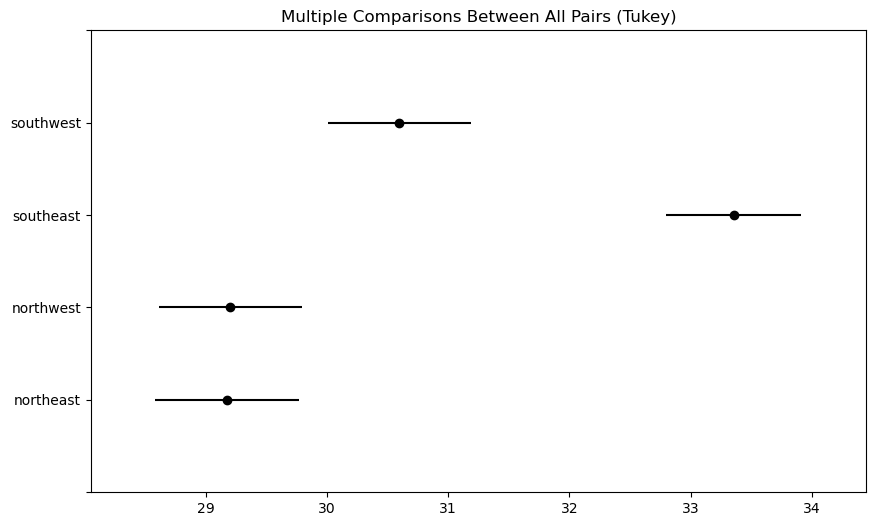

In [82]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

tukey_result = pairwise_tukeyhsd(data['bmi'], data['region'])
print(tukey_result)

tukey_result.plot_simultaneous()
plt.show()

In [83]:
model_two_way = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=data).fit()
anova_two_way = sm.stats.anova_lm(model_two_way, typ=2)

print(anova_two_way)

                        sum_sq      df          F        PR(>F)
C(region)          4034.975135     3.0  39.398134  2.163195e-24
C(sex)               86.007035     1.0   2.519359  1.126940e-01
C(region):C(sex)    174.157808     3.0   1.700504  1.650655e-01
Residual          45404.154911  1330.0        NaN           NaN
